Logistics Regression analyzes a data-set which has a dependent variable and one or more independent variables to predict the Outcome in a binary variable, meaning it will have only two outcomes, 1 or 0. 
The dependent variable is categorical in nature.
The distribution of data in logistics regression is sigmoidal. A sigmoid distribution is a statistical function that has an “S” shaped curve. It is also known as a sigmoid curve or a logistic function.
The formula for a sigmoid curve is σ(x) = 1 / (1+e^(-x)). The curve has a value from 0 - 1 but only approaches those limits and does not reach either limit.
In this example the curve will be used as a probablility distribution to determine the likelihood of an Outcome.

In [1]:
# %matplotlib inline  is a magic command to allow you to display plots in the notebook. Jupyter feature
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv(r"C:\Users\alexd\churn_data_log_regression\More_Churn\WA_telco_customer_churn_reduced.csv")
df.head()

,gender,sr_cit,tenure,phone_y_n,internet_type,mon_chg,churn
0,Female,0,1,0,DSL,29.85,0
1,Male,0,34,1,DSL,56.95,0
2,Male,0,2,1,DSL,53.85,1
3,Male,0,45,0,DSL,42.30,0
4,Female,0,2,1,Fiber optic,70.70,1


In [3]:
df.shape

(7043, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         7043 non-null   object 
 1   sr_cit         7043 non-null   int64  
 2   tenure         7043 non-null   int64  
 3   phone_y_n      7043 non-null   int64  
 4   internet_type  7043 non-null   object 
 5   mon_chg        7043 non-null   float64
 6   churn          7043 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 385.3+ KB


In [5]:
df.describe()

,sr_cit,tenure,phone_y_n,mon_chg,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,0.903166,64.761692,0.265370
std,0.368612,24.559481,0.295752,30.090047,0.441561
min,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,1.000000,35.500000,0.000000
50%,0.000000,29.000000,1.000000,70.350000,0.000000
75%,0.000000,55.000000,1.000000,89.850000,1.000000
max,1.000000,72.000000,1.000000,118.750000,1.000000


In [6]:
df.isnull().sum()

gender           0
sr_cit           0
tenure           0
phone_y_n        0
internet_type    0
mon_chg          0
churn            0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='tenure'>

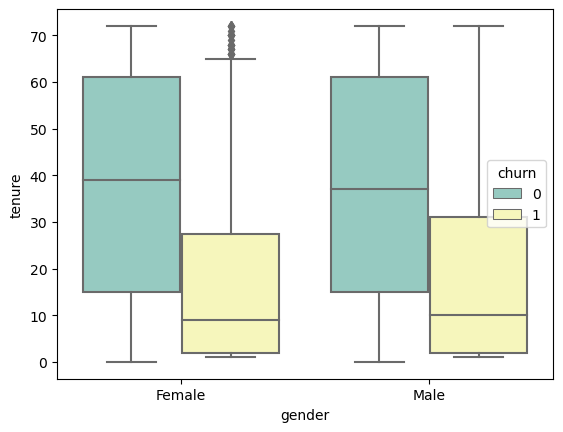

In [10]:
sns.boxplot(x="gender", y="tenure", hue = "churn", data=df, palette='Set3')

In [29]:
X=df.iloc[:, :5].values
y=df.iloc[:, -1].values
print(X)

[['Female' 0 1 0 'DSL']
 ['Male' 0 34 1 'DSL']
 ['Male' 0 2 1 'DSL']
 ...
 ['Female' 0 11 0 'DSL']
 ['Male' 1 4 1 'Fiber optic']
 ['Male' 0 66 1 'Fiber optic']]


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[4])], remainder='passthrough') # where [5] is the column index to transform
X=np.array(ct.fit_transform(X))

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [33]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_regression.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [34]:
predictions = logistic_regression.predict(X_test)
print(predictions)

[0 0 0 ... 0 0 0]


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logistic_regression.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1179  103]
 [ 241  238]]


0.80465644520159

In [36]:
print(logistic_regression.coef_)

[[-0.09910082  1.32935031 -1.12619136 -0.03316494  0.41010777 -0.04517418
  -0.50848493]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report, (y_test, predictions))

<function classification_report at 0x000002B3392BF1F0> (array([1, 0, 0, ..., 0, 1, 0], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64))
